In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('supply_chain_data.csv')

In [8]:
print(df.head())

  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29          

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [11]:
print(df[['price', 'number_of_products_sold', 'shipping_costs']].describe())

            price  number_of_products_sold  shipping_costs
count  100.000000               100.000000      100.000000
mean    49.462461               460.990000        5.548149
std     31.168193               303.780074        2.651376
min      1.699976                 8.000000        1.013487
25%     19.597823               184.250000        3.540248
50%     51.239831               392.500000        5.320534
75%     77.198228               704.250000        7.601695
max     99.171329               996.000000        9.929816


In [12]:
df['supplier_name'] = df['supplier_name'].str.lower().str.strip()

In [14]:
print(df.columns)

Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')


In [15]:
#Sales Analysis
sales_analysis = df.groupby('product_type').agg({'number_of_products_sold': 'sum', 'revenue_generated': 'sum'})


In [18]:
#Cost optimization
cost_analysis = df[['shipping_costs', 'manufacturing_costs']].describe()


In [23]:
#Inventory management
inventory_analysis = df.groupby('product_type')['stock_levels'].agg(['sum', 'mean'])

In [24]:
# Customer Analysis
customer_analysis = df['customer_demographics'].value_counts()

In [25]:
# Defect analysis
defect_analysis = df.groupby('product_type')['defect_rates'].mean()

In [26]:
# Grouping total products sold and revenue by different locations
sales_by_location = df.groupby('location').agg({'number_of_products_sold': 'sum', 'revenue_generated': 'sum'})

In [27]:
# Calculating average shipping time by shipping carriers
shipping_time_analysis = df.groupby('shipping_carriers')['shipping_times'].mean()

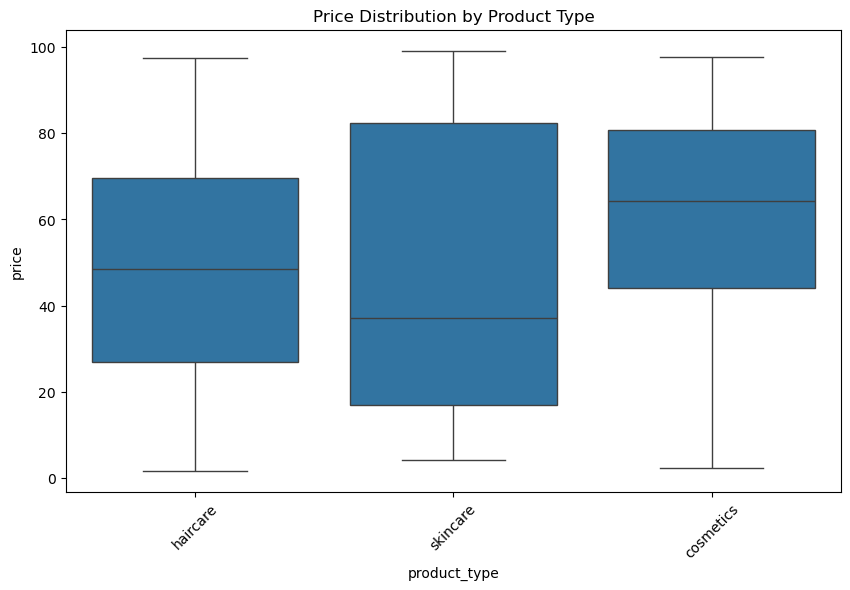

In [31]:
# Creating a box plot to show price distribution by product types
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='product_type', y='price', data=df)  # Plot price data
plt.title('Price Distribution by Product Type')  # Title of the plot
plt.xticks(rotation=45)  # Rotate category names
plt.show()  # Display the plot

In [29]:
# Summing revenue for each product type to identify the most profitable products
revenue_analysis = df.groupby('product_type')['revenue_generated'].sum()

In [32]:
# Summing stock levels for each product type to identify products needing reordering
stock_analysis = df.groupby('product_type')['stock_levels'].sum()

In [34]:
# Analyzing defect rates by suppliers to assess product quality
defect_analysis_by_supplier = df.groupby('supplier_name')['defect_rates'].mean()

In [35]:
# Calculating the correlation between shipping costs and manufacturing costs to understand their relationship
cost_analysis = df[['shipping_costs', 'manufacturing_costs']].corr()

In [38]:
print(df.columns)


Index(['product_type', 'sku', 'price', 'availability',
       'number_of_products_sold', 'revenue_generated', 'customer_demographics',
       'stock_levels', 'lead_times', 'order_quantities', 'shipping_times',
       'shipping_carriers', 'shipping_costs', 'supplier_name', 'location',
       'lead_time', 'production_volumes', 'manufacturing_lead_time',
       'manufacturing_costs', 'inspection_results', 'defect_rates',
       'transportation_modes', 'routes', 'costs'],
      dtype='object')


In [41]:
import pandas as pd

# Create a date range
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('date', inplace=True)

# Now you can proceed with your time series analysis


In [43]:
import pandas as pd

# Assuming your DataFrame is df
# Create a date range starting from a specific date
df['date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('date', inplace=True)  # Set the date as the index


In [44]:
## Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example: Use the correct date column name, e.g., 'order_date'
# Make sure to convert your date column to datetime format and set it as index
df['order_date'] = pd.to_datetime(df['order_date'])  # Change 'order_date' to your actual column name
df.set_index('order_date', inplace=True)

# Resample the data to a monthly frequency, summing the number of products sold
monthly_sales = df['number_of_products_sold'].resample('M').sum()

# Plot the monthly sales to visualize the trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.legend()
plt.show()

# Fit an ARIMA model (AutoRegressive Integrated Moving Average) to the data
model = sm.tsa.ARIMA(monthly_sales, order=(1, 1, 1))  # Example parameters
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecast sales for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the forecast results
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.legend()
plt.show()

KeyError: 'order_date'

In [47]:
print(df.columns.tolist())


['product_type', 'sku', 'price', 'availability', 'number_of_products_sold', 'revenue_generated', 'customer_demographics', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_carriers', 'shipping_costs', 'supplier_name', 'location', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'inspection_results', 'defect_rates', 'transportation_modes', 'routes', 'costs']


In [48]:
# تحليل المبيعات الشهري
monthly_sales = df['number_of_products_sold'].resample('M').sum()
print(monthly_sales)


date
2023-01-31    13279
2023-02-28    14893
2023-03-31    12716
2023-04-30     5211
Freq: ME, Name: number_of_products_sold, dtype: int64


C:\Users\7haze\AppData\Local\Temp\ipykernel_24472\352177767.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['number_of_products_sold'].resample('M').sum()


In [50]:
df.to_csv('data.csv', index=False)